<a href="https://colab.research.google.com/github/ross-hugo/Artwork-GAN/blob/main/Discriminator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # !git clone https://github.com/ross-hugo/Artwork-GAN/
# cd Artwork-GAN/

fatal: destination path 'Artwork-GAN' already exists and is not an empty directory.


In [1]:
import os
os.chdir("..")
os.getcwd()

'/Users/rosscopeland/Desktop/school/Machine_Learning_738/projects/Artwork-GAN'

In [2]:
import matplotlib.pyplot as plt
import sys
import numpy as np
from scipy import ndimage

from src.generator import Generator
from src.discriminator import Discriminator
from src.sgan import SGAN

In [3]:
BATCH_SIZE = 32

In [4]:
gan = SGAN(verbosity=True)
gan.discriminator



===== Discriminator Model Summary ======

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Co

In [5]:
gan.compile()

In [6]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
dir = "images/"

#divide by two because discriminator is taking other half from generator
train_ds = image_dataset_from_directory(dir,
  validation_split=0.2, subset="training",
  seed=123,
  labels="inferred",label_mode="int"
  ,image_size=(128, 128), color_mode= "rgb",
    batch_size=BATCH_SIZE//2)

val_ds = image_dataset_from_directory(dir,
  validation_split=0.2, subset="validation",
  seed=123,
  labels="inferred",label_mode="int"
  ,image_size=(128, 128), color_mode= "rgb",
    batch_size=BATCH_SIZE//2)

Found 8118 files belonging to 49 classes.
Using 6495 files for training.
Found 8118 files belonging to 49 classes.
Using 1623 files for validation.


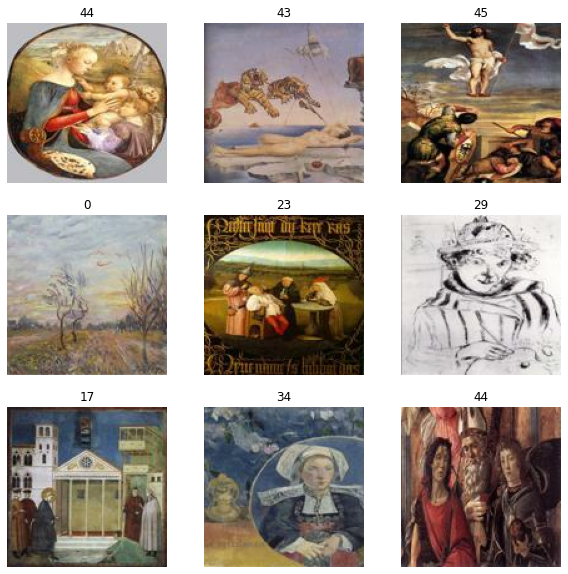

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(int(labels[i]))
      plt.axis("off")

In [ ]:
gan.train(X=train_ds, y=val_ds, epochs=10000, batch_size=BATCH_SIZE, display_iter=2)

  0%|          | 0/10000 [00:00<?, ?it/s]

0
hi
1
2
hi
3
4
hi
5
6
hi


2


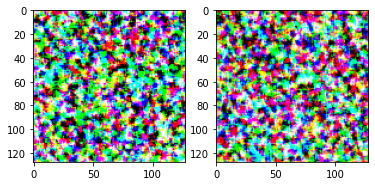

In [21]:
noise = np.random.normal(0,1,(2, 100)) 
print(len(noise))
gen_imgs = gan.generator.predict(noise)
gen_imgs = 127.5 * (gen_imgs + 1)

for i in range(2):
    ax = plt.subplot(1, 2, i+1)
    plt.imshow(gen_imgs[i].astype('uint8'))
#     Image.fromarray(gen_imgs[i])
    

In [ ]:
#save model here